In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
games=pd.read_csv("gamesdataset.csv", encoding="latin1")

In [29]:
games=games[games.year > 1930]

In [23]:
games.drop_duplicates()

,id,description,image,maxplayers,maxplaytime,minage,minplayers,minplaytime,name,playingtime,...,median,numcomments,numweights,owned,stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,trading,usersrated,wanting
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,...,0,1763,719,5251,1.593210,7.29168,147.0,170,4498,505
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,...,0,273,52,1053,1.462820,5.87150,2541.0,73,478,67
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,...,0,3281,1355,11870,1.185310,7.28295,150.0,234,12019,707
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,60.0,Tal der Könige,60.0,...,0,111,30,523,1.210280,5.76636,3191.0,29,314,61
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6.0,90.0,12.0,3.0,90.0,Acquire,90.0,...,0,5011,1515,18682,1.330200,7.21895,181.0,823,15195,516
5,6,"In the ancient lands along the Mediterranean, ...",//cf.geekdo-images.com/images/pic28424.jpg,6.0,240.0,12.0,2.0,240.0,Mare Mediterraneum,240.0,...,0,26,6,106,1.650640,5.57250,6621.0,2,73,39
6,7,"In Cathedral, each player has a set of pieces ...",//cf.geekdo-images.com/images/pic181642.jpg,2.0,20.0,8.0,2.0,20.0,Cathedral,20.0,...,0,1076,258,4561,1.310780,6.21877,1352.0,258,2751,90
7,8,"In this interesting offering from Warfrog, pla...",//cf.geekdo-images.com/images/pic374320.jpg,5.0,120.0,12.0,2.0,120.0,Lords of Creation,120.0,...,0,82,15,460,1.255080,5.60857,5371.0,26,186,28
8,9,"Although referred to as a sequel to El Grande,...",//cf.geekdo-images.com/images/pic1731731.jpg,4.0,90.0,13.0,2.0,90.0,El Caballero,90.0,...,0,529,143,2263,1.404130,6.07659,1711.0,141,1263,113
9,12,Ra is an auction and set-collection game with ...,//cf.geekdo-images.com/images/pic3013552.jpg,5.0,60.0,12.0,2.0,45.0,Ra,60.0,...,0,4431,1660,14413,1.339560,7.35343,123.0,252,15378,879


# More new games were invented after 2000 than in the 20th century

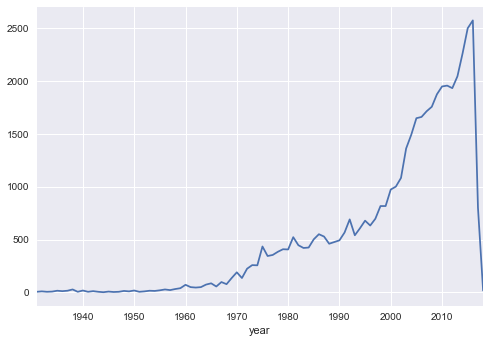

In [4]:
games.groupby("year").size().plot()

In [5]:
twothousands=games[games.year > 2000]
twothousands.year=twothousands.year.astype(int)

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


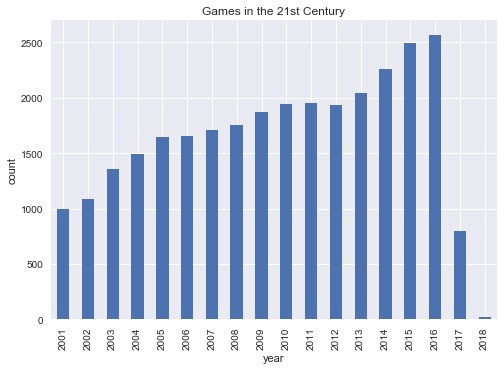

In [5]:
twothousands.groupby("year").size().plot(kind="bar")
plt.title("Games in the 21st Century")
plt.xlabel("year")
plt.ylabel("count")

Steadily more games have been produced in the 2000s,  doubling in ten years

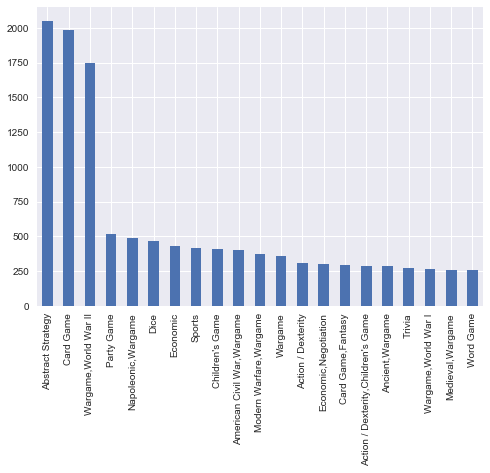

In [16]:
cats=games.category.value_counts()
cats=cats[cats>250]
cats.plot(kind="bar")

In [7]:
games.columns

AttributeError: 'function' object has no attribute 'columns'

In [14]:
games['avgplayers']=(games["minplayers"]+games["maxplayers"])/2

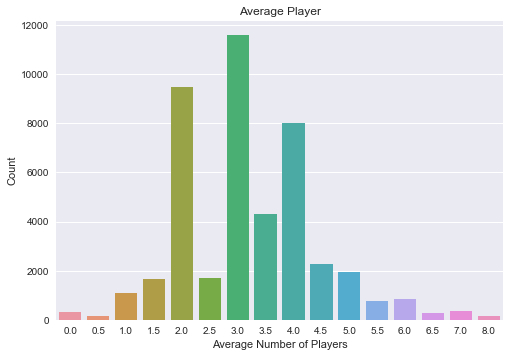

In [26]:
avgplayer=games.avgplayers.value_counts()
avgplayer=avgplayer[avgplayer > 110]
sns.barplot(x=avgplayer.index, y=avgplayer)
plt.title("Average Player")
plt.xlabel("Average Number of Players")
plt.ylabel("Count")

In [53]:
games["minplaytime"]=pd.to_numeric(games["minplaytime"])
games["maxplaytime"]=pd.to_numeric(games["maxplaytime"])
games=games.replace(0, np.nan)

In [54]:
games['avgplaytime']=(games["minplaytime"]+games["maxplaytime"])/2

In [55]:
avgplaytime=games.avgplaytime.value_counts()
longgames=avgplaytime[avgplaytime > 400]
avgplaytime=avgplaytime[avgplaytime < 400]

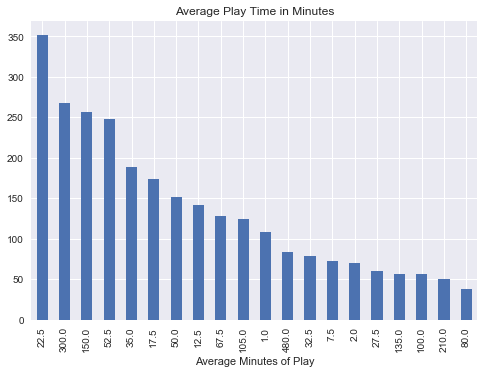

In [59]:
avgplaytime.sort_values(ascending=False).head(20).plot(kind="bar")
plt.title("Average Play Time in Minutes")
plt.xlabel("Average Minutes of Play")

In [6]:
x=games[games.geekscore.notnull()]
geeks=x.geekscore
x.geekscore.hist()
plt.title("Geek Score Distribution")

AttributeError: 'function' object has no attribute 'geekscore'

Note that the geek score is much lower than the average score

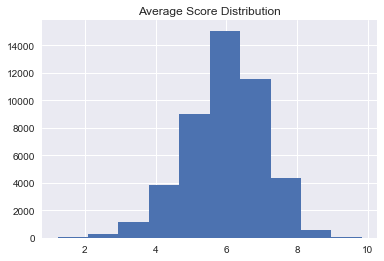

In [115]:
games.average.hist()
plt.title("Average Score Distribution")

In [52]:
topscores=games[games.geekscore > 7]
topscores.drop_duplicates()
topscores.sort_values(by="geekscore", ascending=False)

,id,description,image,maxplayers,maxplaytime,minage,minplayers,minplaytime,name,playingtime,...,median,numcomments,numweights,owned,stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,trading,usersrated,wanting
20523,161936,Pandemic Legacy is a co-operative campaign gam...,//cf.geekdo-images.com/images/pic2452831.png,4.0,60.0,13.0,2.0,60.0,Pandemic Legacy: Season 1,60.0,...,0,2947,613,28322,1.73529,8.48966,1.0,107,17251,646
44455,161936,Pandemic Legacy is a co-operative campaign gam...,//cf.geekdo-images.com/images/pic2452831.png,4.0,60.0,13.0,2.0,60.0,Pandemic Legacy: Season 1,60.0,...,0,2947,613,28322,1.73529,8.48966,1.0,107,17251,646
45922,182028,Through the Ages: A New Story of Civilization ...,//cf.geekdo-images.com/images/pic2663291.jpg,4.0,240.0,14.0,2.0,180.0,Through the Ages: A New Story of Civilization,240.0,...,0,1058,373,9337,1.46808,8.30554,2.0,50,6888,1017
21990,182028,Through the Ages: A New Story of Civilization ...,//cf.geekdo-images.com/images/pic2663291.jpg,4.0,240.0,14.0,2.0,180.0,Through the Ages: A New Story of Civilization,240.0,...,0,1058,373,9337,1.46808,8.30554,2.0,50,6888,1017
46290,187645,From the publisher:&#10;&#10;Star Wars: Rebell...,//cf.geekdo-images.com/images/pic2737530.png,4.0,240.0,14.0,2.0,180.0,Star Wars: Rebellion,240.0,...,0,1423,292,13553,1.36380,8.14551,5.0,80,8142,1125
22358,187645,From the publisher:&#10;&#10;Star Wars: Rebell...,//cf.geekdo-images.com/images/pic2737530.png,4.0,240.0,14.0,2.0,180.0,Star Wars: Rebellion,240.0,...,0,1423,292,13553,1.36380,8.14551,5.0,80,8142,1125
21410,174430,Gloomhaven is a game of Euro-inspired tactical...,//cf.geekdo-images.com/images/pic2437871.jpg,4.0,150.0,12.0,1.0,90.0,Gloomhaven,150.0,...,0,1127,222,5265,1.65144,8.11567,6.0,19,3503,702
45342,174430,Gloomhaven is a game of Euro-inspired tactical...,//cf.geekdo-images.com/images/pic2437871.jpg,4.0,150.0,12.0,1.0,90.0,Gloomhaven,150.0,...,0,1127,222,5265,1.65144,8.11567,6.0,19,3503,702
17384,108687,Puerto Rico: Anniversary Edition is a tenth an...,//cf.geekdo-images.com/images/pic1188353.jpg,5.0,150.0,13.0,2.0,90.0,Puerto Rico: Limited Anniversary Edition,150.0,...,0,722,207,4504,1.66999,7.83905,NaN,29,3369,363
41316,108687,Puerto Rico: Anniversary Edition is a tenth an...,//cf.geekdo-images.com/images/pic1188353.jpg,5.0,150.0,13.0,2.0,90.0,Puerto Rico: Limited Anniversary Edition,150.0,...,0,722,207,4504,1.66999,7.83905,NaN,29,3369,363
